In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

In [2]:
!pip install datadotworld
!pip install datadotworld[pandas]

     |████████████████████████████████| 17.3MB 237kB/s 
     |████████████████████████████████| 10.1MB 50.2MB/s 
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 0.24.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


In [0]:
!dw configure

In [0]:
import datadotworld as dw
drive.mount("/content/drive")

In [5]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [6]:
ls

HelloGithub.ipynb  LICENSE  README.md


In [0]:
!mkdir data

In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [14]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [15]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [16]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
10110,AVpfSC1DilAPnD_xYxMJ,NaN,MUK LUKS,"All Men's Shoes,Men's Slippers,Shoes,Men's Sho...","Medium Grey,Grey",NaN,2017-01-14T19:32:31Z,2017-01-14T19:32:31Z,"[{""dateSeen"":[""2016-08-04T04:06:51Z""],""sourceU...",6.0 in x 6.0 in x 1.0 in,3.397713e+10,"[{""key"":""Primary Color"",""value"":[""Gray""]},{""ke...",NaN,https://i5.walmartimages.com/asr/4e7cf4be-49ab...,NaN,"mukluksmensgavinslippers/554272255,03397712939...",Reliable of Milwuakee,0003397712939,"[{""dateSeen"":[""2017-01-14T19:32:31Z""],""name"":""...",Muk Luks Men's Gavin Slippers,22.95,22.95,NaN,NaN,NaN,NaN,USD,2017-01-14T19:32:31Z,2016-06-07T00:00:00Z,NaN,true,NaN,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/MUK-LUKS-Men-s-Gavin...,NaN,NaN,NaN,"13,11,9","[{""sourceURLs"":[""https://www.walmart.com/ip/MU...",https://www.walmart.com/ip/MUK-LUKS-Men-s-Gavi...,033977129399,NaN,NaN,NaN
14075,AVpflmKM1cnluZ0-ng6u,NaN,Ralph Lauren,"Men,Shoes,Boots",Black,NaN,2015-08-18T16:43:18Z,2016-02-25T20:30:31Z,NaN,NaN,NaN,NaN,NaN,http://www.ralphlauren.com/graphics/product_im...,NaN,"girtonwashedcalfskinboot/10727788,ralphlauren/...",NaN,11828827,"[{""address"":""650 Madison Ave C1"",""availability...",Girton Washed Calfskin Boot,995.00,995.00,NaN,Black,New,NaN,USD,2015-08-18T16:43:18Z,2015-08-11T00:00:00Z,NaN,false,www.ralphlauren.com,NaN,The full amount will be credited to the origin...,FREE SHIPPING ON ORDERS OVER $125. $5 FLAT-RAT...,13 D,NaN,http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ralphlauren.com/pr...",http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN
5039,AVpfLgFO1cnluZ0-fm9q,NaN,Carrera,"Sunglasses,Bags & Accessories,Men's Accessorie...",NaN,NaN,2016-01-01T02:17:17Z,2016-02-16T01:42:42Z,NaN,NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]}]",NaN,http://c.shld.net/rpx/i/s/pi/mp/26509/prod_758...,NaN,carrera/ps5530189,NaN,ps5530189,NaN,Carrera Ca38/s Men Sunglasses,130.00,130.00,NaN,NaN,NaN,NaN,USD,2016-01-01T02:17:17Z,2016-01-14T00:00:00Z,NaN,false,Sears.com,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
12588,AVpe9FIz1cnluZ0-apJE,"B008F063BW,B008F063KS",Nike,"Active,Men,Athletic Socks,Sports & Fitness,Exe...",Blackredwhite,NaN,2015-04-03T18:44:31Z,2016-07-30T03:43:09Z,NaN,NaN,NaN,NaN,NaN,http://ecx.images-amazon.com/images/I/51%2BoxH...,NaN,"drifitcrew3colorl961/b008f063bw,drifitcrew3col...",NaN,SX4689-961,NaN,Dri-fit Crew 3 Color L 961,29.95,29.95,NaN,NaN,NaN,NaN,USD,2016-04-01T18:47:28Z,2016-02-28T00:00:00Z,NaN,false,SHAII,NaN,NaN,FREE Shipping on orders over USD 49.00 FREE Re...,NaN,NaN,http://www.amazon.com/Nike-SX4689-961-Dri-fit-...,NaN,NaN,"[{""date"":""2015-02-19T00:00:00Z"",""dateAdded"":""2...","Medium,Large,Extra Large",NaN,https://www.amazon.com/Nike-SX4689-961-Dri-fit...,NaN,NaN,NaN,1 pounds
2792,AVpfB8XDilAPnD_xTak3,NaN,ASICS,"Athletic & Running Shoes,Men's Shoes,Running S...",NaN,NaN,2016-01-20T21:23:26Z,2016-07-21T13:39:32Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asics/33701866,NaN,33701866,NaN,Asics Men's Gel-kayano 21 Running Shoes,76.97,76.97,NaN,NaN,NaN,NaN,USD,2016-01-20T21:23:26Z,2016-01-20T21:23:26Z,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sportsauthority.com/ASICS-Mens-GEL-...,NaN,NaN,NaN,NaN,NaN,http://www.sportsauthority.com/ASICS-Mens-GEL-...,NaN,NaN,NaN,NaN


In [17]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [18]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [19]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
New with box                                          0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
new                                                   0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
New without tags                                      0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[df.prices_currency=='USD'].copy()

In [21]:
df_usd.shape

(18524, 48)

In [27]:
df_usd.prices_amountmin.astype(np.float)
#df_usd['prices_amountmin'].hist()

0         39.89
1         51.99
2         40.02
3         50.31
4         46.26
5         55.99
6         41.12
7         46.19
8         21.40
9         45.23
10        45.00
11         7.99
12         9.99
13         9.99
14        19.99
15        25.00
16        15.99
17         9.99
19       299.99
20       124.95
21       124.95
22        60.02
23        54.22
24        44.99
25         5.99
26        86.98
27       149.00
28        63.00
29        13.99
30        23.99
          ...  
19355     17.99
19356     91.29
19357     91.29
19358    200.00
19359    114.75
19360    115.00
19361    121.50
19362     75.00
19363     25.99
19365     69.95
19367     86.01
19368    149.95
19369    174.00
19370     44.99
19371    170.00
19372    123.63
19373    123.63
19374    168.60
19375    129.59
19376     18.94
19377     18.30
19378     65.99
19379     58.99
19380     34.99
19381     94.00
19382     29.95
19383     64.95
19384     32.48
19385     31.48
19386     72.00
Name: prices_amountmin, 

In [28]:
np.percentile(df_usd['prices_amountmin'], 99)

TypeError: ignored

In [0]:
df_usd['prices_amountmin'] = df_usd['prices_amountmin'].astype(float)

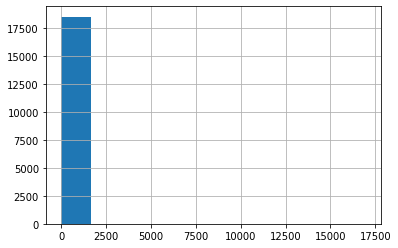

In [36]:
df_usd['prices_amountmin'].hist()

In [0]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)

In [0]:
df_usd_filter = df_usd[df_usd['prices_amountmin'] < filter_max]

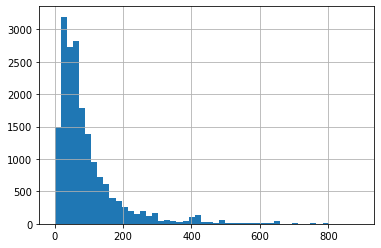

In [42]:
df_usd_filter.prices_amountmin.hist(bins=50)

In [60]:
ls matrix_one

day3b.ipynb


In [63]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    matrix_one/day3.ipynb
	modified:   matrix_one/day3b.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add matrix_one/day3b.ipynb

In [65]:
!git commit -m "Read men's shoe prices dataset from data.world."

[master 2cf86a6] Read men's shoe prices dataset from data.world.
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
!git config --global user.email "interes@o2.pl"
!git config --global user.name "Rafall"

In [69]:
!git push -u origin master

To https://github.com/rafallysik/dw_matrix.git
 ! [rejected]        master -> master (non-fast-forward)
error: failed to push some refs to 'https://a908fbad6ebae1b8c9abdd093be779819e7465da@github.com/rafallysik/dw_matrix.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [70]:
!git pull

error: Pulling is not possible because you have unmerged files.
hint: Fix them up in the work tree, and then use 'git add/rm <file>'
hint: as appropriate to mark resolution and make a commit.
fatal: Exiting because of an unresolved conflict.


In [71]:
!git rm matrix_one/day3.ipynb

matrix_one/day3.ipynb: needs merge
rm 'matrix_one/day3.ipynb'
